<a href="https://colab.research.google.com/github/Vikas5050/Underwater-Image-Processing/blob/main/DCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

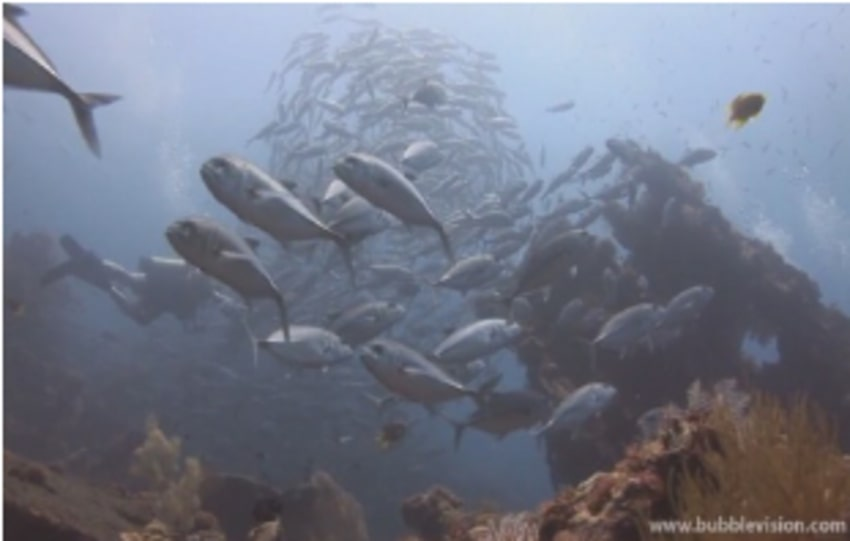

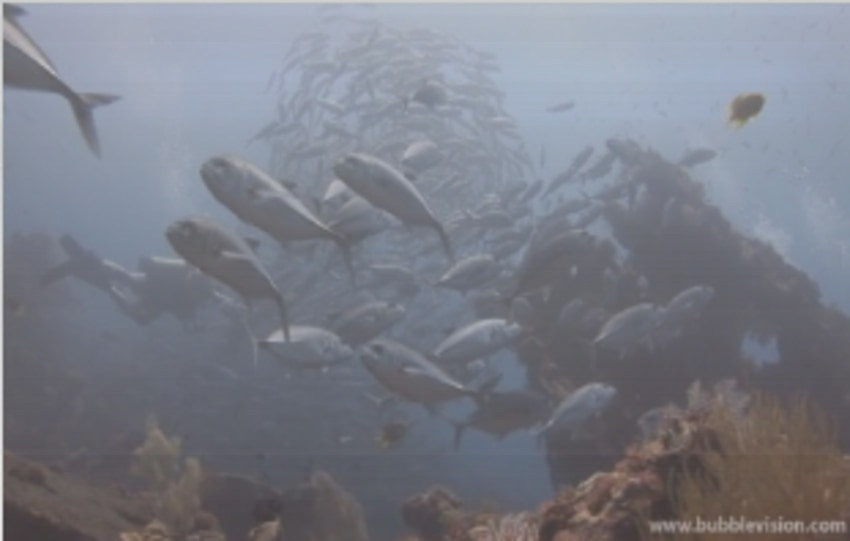

In [ ]:
import cv2
import numpy as np

def DCP(image):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract the V channel
    V = hsv[:,:,2]

    # Compute the dark channel
    dark_channel = np.min(V, axis=1)

    # Compute the transmission map
    transmission_map = 1 - (dark_channel / 255) ** 0.95

    # Compute the atmospheric light
    atmospheric_light = np.percentile(dark_channel, 99)

    # Compute the global atmospheric light
    global_atmospheric_light = np.max(atmospheric_light)

    # Compute the transmission map under the constraint of the atmospheric light
    transmission_map = np.maximum(transmission_map, global_atmospheric_light / 255)

    # Compute the corrected image
    corrected_image = image.copy()
    corrected_image = corrected_image * transmission_map[:, np.newaxis, np.newaxis] + (1 - transmission_map)[:, np.newaxis, np.newaxis] * global_atmospheric_light

    # Clip pixel values to [0, 255]
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

    return corrected_image

# Test the function
image_path = 'underwater_image.jpg'
image = cv2.imread(image_path)
enhanced_image = DCP(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2_imshow(enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()